https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [3]:
trainset = torchvision.datasets.FashionMNIST('../data',
                                             download=True,
                                             train=True,
                                             transform=transform)
testset = torchvision.datasets.FashionMNIST('../data',
                                            download=False,
                                            train=False,
                                            transform=transform)

In [4]:
trainingloader = torch.utils.data.DataLoader(trainset,
                                             batch_size=4,
                                             shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=4,
                                         shuffle=False, num_workers=2)

In [5]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [6]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=1e-3,momentum=0.9)

In [14]:
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/test')

In [12]:
pip install tensorboard

  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
     |████████████████████████████████| 4.2 MB 3.4 MB/s            
  Using cached tensorboard_data_server-0.6.1-py3-none-macosx_10_9_x86_64.whl (3.5 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached google_auth-2.3.3-py2.py3-none-any.whl (155 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached Werkzeug-2.0.2-py3-none-any.whl (288 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached importlib_metadata-4.10.0-py3-none-any.whl (17 kB)
  Using cached charset_normalizer-2.0.10-py3-none-an

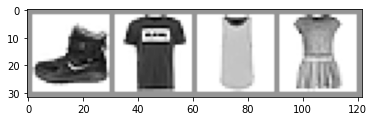

In [15]:
dataiter = iter(trainingloader)
images, labels = dataiter.next()

img_grid = torchvision.utils.make_grid(images)

matplotlib_imshow(img_grid, one_channel=True)

writer.add_image("four images", img_grid)

# tensorflow doesn't work now on mac os M1

In [17]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.7.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C
